In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from statsmodels.graphics.mosaicplot import mosaic


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (15, 10)

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

<center>


**Table 1: Customer Churn Dataset** 

| Feature          | Description                                           | Type                  |
|------------------|-------------------------------------------------------|-----------------------|
| customerID       | Customer ID, a unique identifier                       | Categorical           |
| gender           | Whether the customer is male or female                 | Categorical           |
| SeniorCitizen    | Whether the customer is a senior citizen (1 or 0)      | Dichotomous categorical |
| Partner          | Whether the customer has a partner (Yes or No)         | Categorical           |
| Dependents       | Whether the customer has dependents (Yes or No)        | Categorical           |
| tenure           | Number of months the customer has stayed               | Integer-valued         |
| PhoneService     | Whether the customer has phone service (Yes or No)      | Categorical           |
| MultipleLines    | Whether the customer has multiple lines                | Categorical           |
| InternetService  | Customer’s internet service provider                   | Categorical           |
| OnlineSecurity   | Whether the customer has online security               | Categorical           |
| OnlineBackup     | Whether the customer has online backup                 | Categorical           |
| DeviceProtection | Whether the customer has device protection             | Categorical           |
| TechSupport      | Whether the customer has tech support                  | Categorical           |
| StreamingTV      | Whether the customer has streaming TV                  | Categorical           |
| StreamingMovies  | Whether the customer has streaming movies              | Categorical           |
| Contract         | The contract term of the customer                      | Categorical           |
| PaperlessBilling | Whether the customer has paperless billing             | Categorical           |
| PaymentMethod    | The customer’s payment method                          | Categorical           |
| MonthlyCharges   | The amount charged to the customer monthly             | Continuous            |
| TotalCharges     | The total amount charged to the customer               | Continuous            |
| Churn            | Whether the customer churned (Yes or No)               | Categorical           |

</center>

In [96]:
data = data.drop(columns="customerID")

In [97]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [98]:
data.isna().sum()[data.isna().sum() != 0]

TotalCharges    11
dtype: int64

In [99]:
data["TotalCharges"].fillna(0, inplace=True)

In [43]:
product_tenure_monthly = data["tenure"] * data["MonthlyCharges"]

correlation = data[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
print("\nCorrelation Matrix:")
print(correlation)

correlation_coefficient = data["TotalCharges"].corr(product_tenure_monthly)
print("\nCorrelation Coefficient between tenure and TotalCharges divided by MonthlyCharges:")
print(correlation_coefficient)


Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000

Correlation Coefficient between tenure and TotalCharges divided by MonthlyCharges:
0.9995605537972285


So we can conclude, that feature Total Charges is just tenure multiplied by MonthlyCharges. We deciced to drop it from our data.

In [100]:
data = data.drop(columns="TotalCharges")

## Numerical features

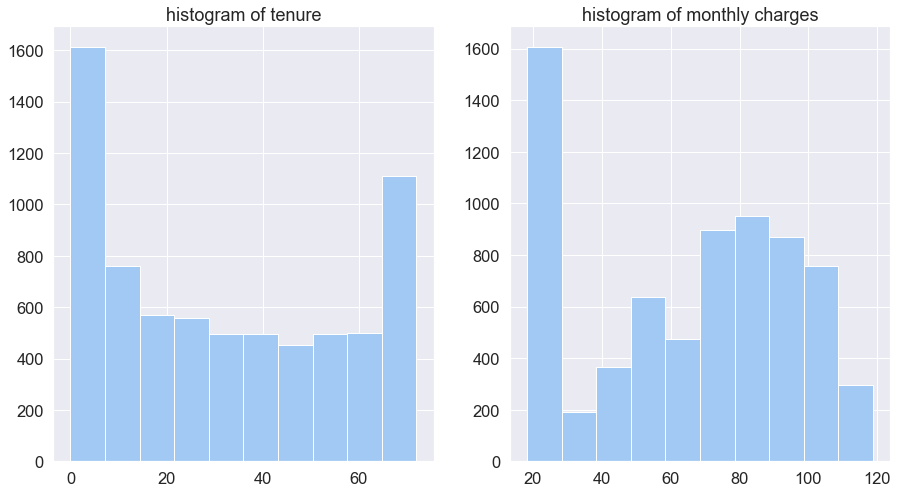

In [71]:
plt.rcParams["figure.figsize"] = (15, 8)
plt.subplot(121)
plt.title('Histogram of tenure')
plt.hist(data.tenure)
plt.subplot(122)

plt.title('Histogram of monthly charges')
plt.hist(data.MonthlyCharges)
plt.show()


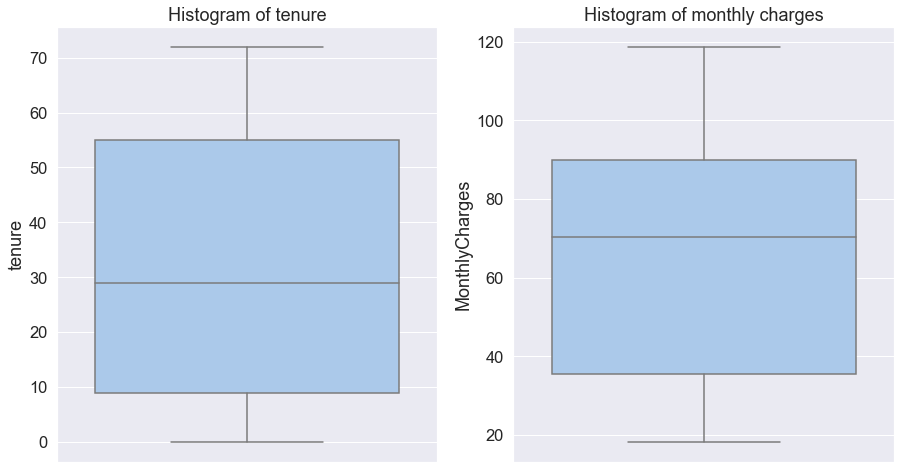

In [74]:
plt.rcParams["figure.figsize"] = (15, 8)
plt.subplot(121)
plt.title('Histogram of tenure')
sns.boxplot(y=data.tenure)
plt.subplot(122)

plt.title('Histogram of monthly charges')
sns.boxplot(y=data.MonthlyCharges)
plt.show()


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

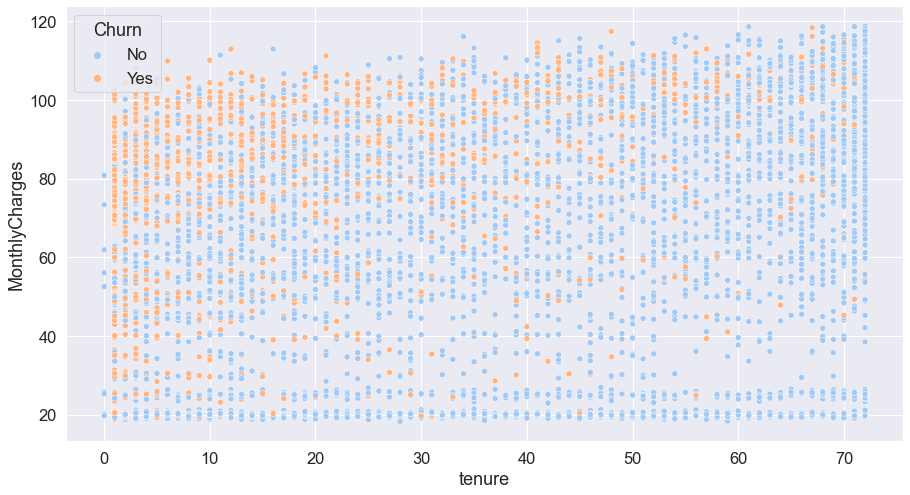

In [78]:
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue="Churn")

Using boxplot and scatterplot we haven't spoted outliers in our numerical features.

<center>

**Table 2: Feature Distribution in Dataset**

| Feature            | Categories              | Count |
|--------------------|-------------------------|------:|
| Gender             | Male                    |  3555 |
|                    | Female                  |  3488 |
| Senior Citizen     | 0                       |  5901 |
|                    | 1                       |  1142 |
| Partner            | Yes                     |  3402 |
|                    | No                      |  3641 |
| Dependents         | Yes                     |  2110 |
|                    | No                      |  4933 |
| Phone Service      | Yes                     |  6361 |
|                    | No                      |   682 |
| Multiple Lines     | Yes                     |  2971 |
|                    | No                      |  3390 |
|                    | No phone service        |   682 |
| Internet Service   | Fiber optic             |  3096 |
|                    | DSL                     |  2421 |
|                    | No                      |  1526 |
| Online Security    | Yes                     |  2019 |
|                    | No                      |  3498 |
|                    | No internet service     |  1526 |
| Online Backup      | Yes                     |  2429 |
|                    | No                      |  3088 |
|                    | No internet service     |  1526 |
| Device Protection  | Yes                     |  2422 |
|                    | No                      |  3095 |
|                    | No internet service     |  1526 |
| Tech Support       | Yes                     |  2044 |
|                    | No                      |  3473 |
|                    | No internet service     |  1526 |
| Streaming TV       | Yes                     |  2707 |
|                    | No                      |  2810 |
|                    | No internet service     |  1526 |
| Streaming Movies   | Yes                     |  2732 |
|                    | No                      |  2785 |
|                    | No internet service     |  1526 |
| Contract           | Month-to-month          |  3875 |
|                    | Two year                |  1695 |
|                    | One year                |  1473 |
| PaperlessBilling   | Yes                     |  4171 |
|                    | No                      |  2872 |
| Payment Method     | Electronic check        |  2365 |
|                    | Mailed check            |  1612 |
|                    | Bank transfer (automatic)|  1544 |
|                    | Credit card (automatic) |  1522 |
| Churn              | Yes                     |  1869 |
|                    | No                      |  5174 |

</center>


In [10]:
columns = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

indices = [
    data[data[column] == "No internet service"].index.to_list() for column in columns
]

all_equal = all(idx == indices[0] for idx in indices)
all_equal

True

In [101]:
feature_columns = [
    "gender", "SeniorCitizen",
    "Partner", "Dependents",
    "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod",
]

feature_importance = {}

for feature in feature_columns:
    contingency_table = pd.crosstab(data[feature], data["Churn"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    feature_importance[feature] = p
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1])
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Contract: 5.863038300673391e-258
OnlineSecurity: 2.661149635176552e-185
TechSupport: 1.4430840279998987e-180
InternetService: 9.571788222840544e-160
PaymentMethod: 3.6823546520097993e-140
OnlineBackup: 2.0797592160864276e-131
DeviceProtection: 5.505219496457244e-122
StreamingMovies: 2.667756755723681e-82
StreamingTV: 5.528994485739183e-82
PaperlessBilling: 4.073354668665985e-58
Dependents: 4.9249216612154196e-43
SeniorCitizen: 1.510066805092378e-36
Partner: 2.1399113440759935e-36
MultipleLines: 0.0034643829548773
PhoneService: 0.3387825358066928
gender: 0.48657873605618596


After analysing feature analysing, we decided to exclude gender, phoneservice and multiplelines

In [102]:
data = data.drop(columns=["gender", "PhoneService"])

In [104]:
nominal_features = ('PaperlessBilling', 'Dependents', 'Partner', 'Churn')
for feature in nominal_features:
    data[feature] = data[feature].map({'Yes': 1, 'No': 0})

In [105]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'MultipleLines', 
                                                       'StreamingMovies', 'Contract', 'PaymentMethod']) 

# No internet service column has the same values (we checked it before) for OnlineSecurity, OnlineBackup, DeviceProtection, 
# TechSupport, StreamingTV and StreamingMovies


one_hot_encoded_data.drop(columns = ['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
                                     'DeviceProtection_No internet service', 'TechSupport_No internet service', 
                                     'StreamingTV_No internet service', 'StreamingMovies_No internet service'], inplace=True)


In [115]:
X = one_hot_encoded_data.drop(columns='Churn')
y = one_hot_encoded_data.Churn

## Random forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split

### Normal spliting

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
RandomForest = RandomForestClassifier(criterion='gini').fit(X_train, y_train)
# print(RandomForest.score(X_test, y_test))

y_predict = RandomForest.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

[[936 100]
 [199 174]]
kappa: 0.4042990926431558


In [123]:
RandomForest = RandomForestClassifier(criterion='entropy').fit(X_train, y_train)

y_predict = RandomForest.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

[[945  91]
 [189 184]]
kappa: 0.44267547416094777


### Let's train our model using two groups of equal size.

In [161]:
len(X_train[y_train == 0]), len(X_train[y_train == 1])

(4138, 1496)

In [182]:
len_1 = len(X_train[y_train == 1])

Ix = np.hstack((np.random.choice(y_train[y_train==0].index, len_1, replace=False), y_train[y_train==1].index))
X_train_equal_groups = X_train.loc[Ix]
y_train_equal_groups = y_train.loc[Ix]


2992

In [183]:
RandomForest = RandomForestClassifier(criterion='gini').fit(X_train_equal_groups, y_train_equal_groups)
# print(RandomForest.score(X_test, y_test))

y_predict = RandomForest.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1036
           1       0.51      0.78      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[752 284]
 [ 83 290]]
kappa: 0.4293210935870454


In [184]:
RandomForest = RandomForestClassifier(criterion='entropy').fit(X_train_equal_groups, y_train_equal_groups)

y_predict = RandomForest.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[756 280]
 [ 85 288]]
kappa: 0.42992835931412055


## Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [154]:
gnb = GaussianNB().fit(X_train, y_train)

y_predict = gnb.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.75      1409

[[736 300]
 [ 67 306]]
kappa: 0.44237735014854385


Very good result for us!

In [153]:
gnb = CategoricalNB().fit(X_train, y_train)

y_predict = gnb.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

[[776 260]
 [ 78 295]]
kappa: 0.4670058487647758


### Equal training groups

In [185]:
gnb = GaussianNB().fit(X_train_equal_groups, y_train_equal_groups)

y_predict = gnb.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1036
           1       0.49      0.83      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409

[[716 320]
 [ 62 311]]
kappa: 0.42977826275810194


In [187]:
gnb = CategoricalNB().fit(X_train_equal_groups, y_train_equal_groups)

y_predict = gnb.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1036
           1       0.50      0.83      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409

[[726 310]
 [ 65 308]]
kappa: 0.43506887161321983


## Logistic regression

In [155]:
from sklearn.linear_model import LogisticRegression

In [159]:
LogReg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

y_predict = LogReg.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409

[[937  99]
 [156 217]]
kappa: 0.5112064919428894


In [188]:
LogReg = LogisticRegression(max_iter=1000).fit(X_train_equal_groups, y_train_equal_groups)

y_predict = LogReg.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('kappa:', cohen_kappa_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

[[750 286]
 [ 62 311]]
kappa: 0.4678217606862839


## Super vector machines